In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Understanding Data

#### Reading the titanic_train.csv into a pandas dataframe.

In [2]:
train = pd.read_csv('titanic_train.csv')
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

Checking the missing data in the DataFrame.

Here using seaborn to create a heatmap to see where we are missing data.

In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
train['Age'].isnull().sum()

177

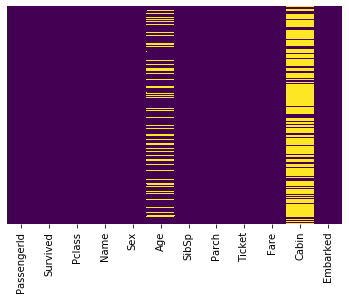

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False,cmap='viridis')

Here 20% of the Age data is missing. The propotion of Age missing is small enough for reasonable replacement.

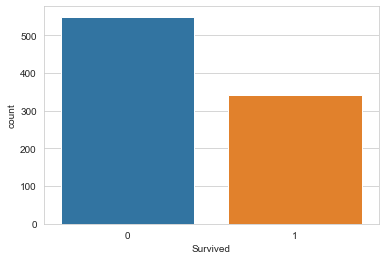

In [8]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data=train)

In [9]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

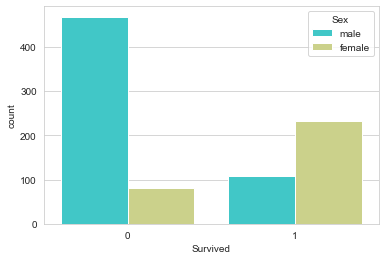

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue ='Sex', data=train, palette='rainbow')

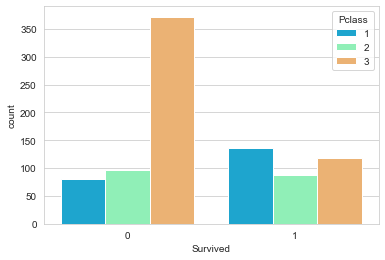

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

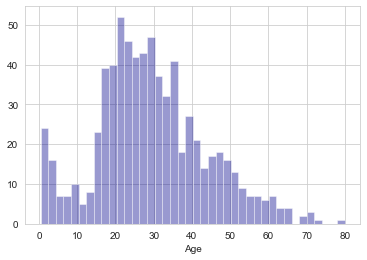

In [12]:
sns.distplot(train['Age'].dropna(),kde=False, color='darkblue', bins = 40)

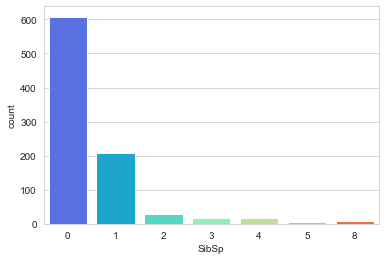

In [13]:
sns.countplot(x='SibSp', data=train, palette='rainbow')

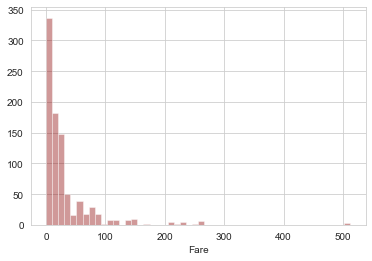

In [14]:
sns.distplot(train['Fare'], kde=False, color = 'darkred')

## Data Cleaning

We want to fill the missing Age data instead of just droping the missing age data rows. So, we will check the average age by passenger class.

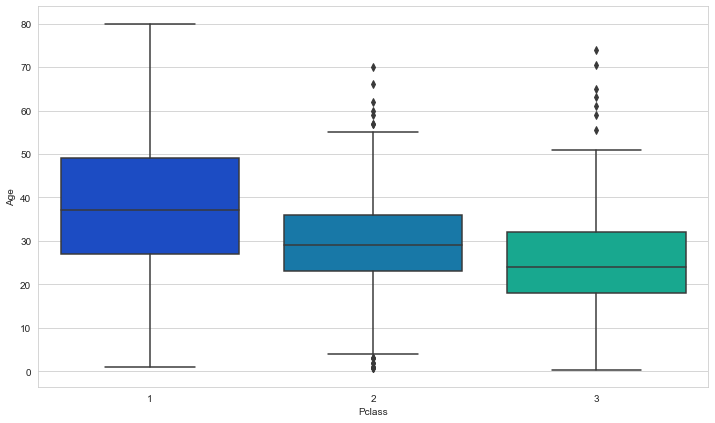

In [15]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y= 'Age', data= train, palette='winter')

In [16]:
def avg_age(a):
    Age = a[0]
    Pclass = a[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [17]:
train['Age'] = train[['Age', 'Pclass']].apply(avg_age, axis=1)

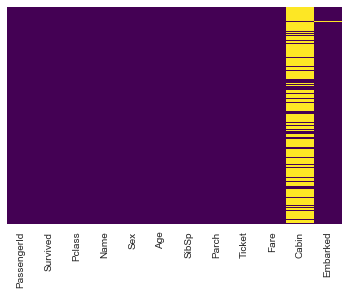

In [18]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

Now dropping the cabin column and the row in Embarked that is NaN.

In [19]:
train.drop('Cabin', axis = 1, inplace=True)

In [20]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


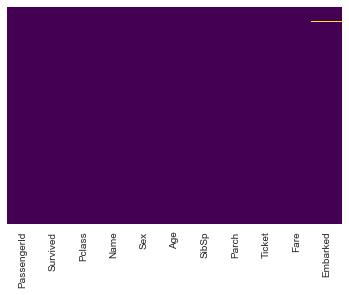

In [21]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [22]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [24]:
train.drop(['Sex', 'Embarked', 'Ticket'], axis=1, inplace=True)

In [25]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500


In [26]:
train = pd.concat([train, sex, embark], axis = 1)

In [27]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,1
